# EDA

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
import warnings
warnings.filterwarnings(action='ignore')

In [185]:
df = pd.read_csv('../data/main_df2.csv', index_col=0)

## 데이터 확인

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 0 to 1139
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date_cd  1140 non-null   int64  
 1   dong     1140 non-null   object 
 2   temp     1140 non-null   float64
 3   hum      1140 non-null   float64
 4   redust   1140 non-null   float64
 5   pm10     1140 non-null   int64  
 6   pm25     1140 non-null   int64  
 7   o3       1140 non-null   float64
 8   no2      1140 non-null   float64
 9   co       1140 non-null   float64
 10  so2      1140 non-null   float64
 11  buspop   1140 non-null   int64  
 12  stops    1140 non-null   int64  
 13  consts   1140 non-null   int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 133.6+ KB


In [162]:
df.describe()

,date_cd,temp,hum,redust,pm10,pm25,o3,no2,co,so2,buspop,stops,consts
count,1.140000e+03,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,2.022181e+07,19.358772,57.562281,37.723684,33.909649,18.307018,0.031239,0.021105,0.427719,0.002868,26626.779825,64.423684,29.487719
std,2.959663e+03,10.194606,17.879721,67.800526,21.257518,11.587304,0.013748,0.010256,0.146616,0.000704,17554.763650,47.810079,16.096418
min,2.022021e+07,-5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2969.000000,4.000000,1.000000
25%,2.022061e+07,12.000000,44.000000,11.000000,22.000000,10.000000,0.021000,0.014000,0.300000,0.002000,13179.500000,26.000000,18.000000
50%,2.022082e+07,22.000000,58.000000,19.000000,29.000000,15.000000,0.030000,0.018000,0.400000,0.003000,21479.000000,51.000000,28.000000
75%,2.022111e+07,28.000000,70.000000,39.000000,40.000000,24.000000,0.040000,0.026250,0.500000,0.003000,36786.750000,97.000000,38.000000
max,2.023033e+07,35.000000,100.000000,1310.000000,213.000000,70.000000,0.079000,0.060000,1.000000,0.006000,82916.000000,190.000000,106.000000


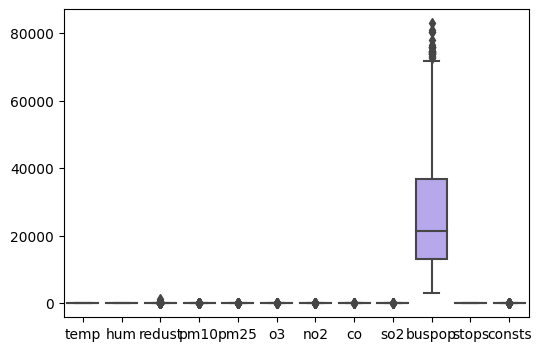

In [163]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df.drop(['date_cd'], axis=1))
plt.show()

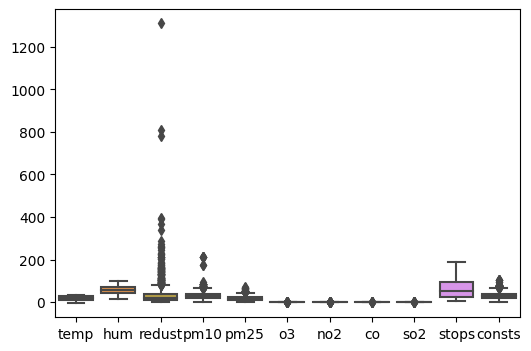

In [164]:
# buspop이 너무 커 제외하고 확인
plt.figure(figsize=(6, 4))
sns.boxplot(data=df.drop(['date_cd', 'buspop'], axis=1))
plt.show()

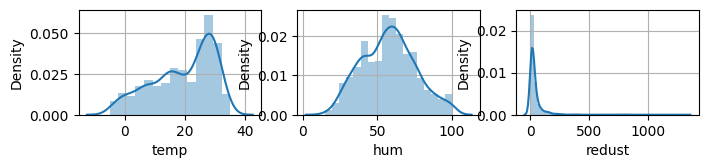

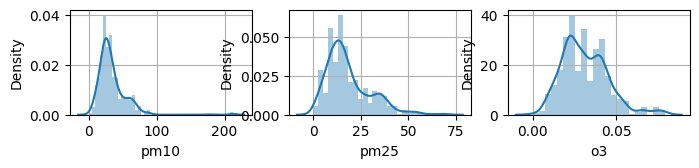

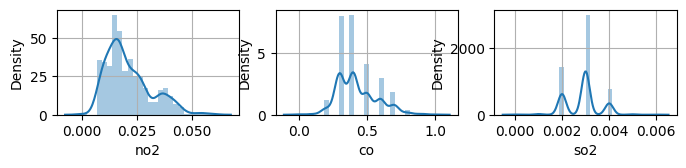

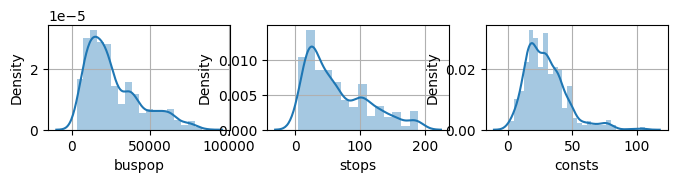

<Figure size 800x300 with 0 Axes>

In [165]:
ix = 1
fig = plt.figure(figsize=(8, 3))
for c in list(df.drop(['dong', 'date_cd'],axis=1).columns):
    if ix <= 3:
        ax2 = fig.add_subplot(2,3,ix+3)
        sns.distplot(df[c])
        plt.grid()            
    ix = ix + 1
    if ix == 4:
        fig = plt.figure(figsize=(8, 3))
        ix = 1

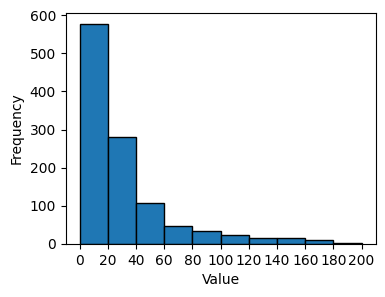

In [176]:
plt.figure(figsize=(4, 3))
plt.hist(df['redust'], bins=range(0, 201, 20), edgecolor='black')
plt.xticks(range(0, 201, 20))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()